# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [63]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\13158\Documents\BEE4750\hw1-CamdenWehrle-Fall24\hw1-CamdenWehrle-Fall24`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [87]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [65]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [66]:
function minimum(array)  
    min_value = Inf 
    for i in 1:length(array)  
        if array[i] < min_value
            min_value = array[i] 
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values); #return the minimum value

minimum(array_values) = 78


For the above problem 1.1, the issue with the code was that the minimum value was small - smaller than you would expect the minimum 
value in an array to be. It should be set to infinity, so the for loop will work as intended and return the value 0. You could also set it to be equal to the first value in the array as well, then if there is a smaller value present in the array it will also be returned as min_value

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [67]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = sum(student_grades)/length(student_grades)
  return average_grade
end

@show class_average(student_grades)

class_average(student_grades) = 94.4


94.4

In this problem 1.2, there were two problems I ran into. First, when trying to show the average, we first need to actually run the 
created function with the array first. Then, the "mean" function used in the class_average function wasn't defined, so I simply
computed the sum of the array divided by the number of entries to find the mean manually. 

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [78]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1000
outcomes = zeros(1,1000)
return(outcomes)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.377


The problem with 1.3 and the thing that returns the methoderror is that "outcomes" should be defined as an array of zeroes, but orignally
was just a single zero, as running the zero function on the variable "n_trials" is only zeroing a single integer. This means there is nothing
for the for loop to iterate through. I changed outcomes to be an array of 1000 zeroes, so the trial results could be appended to it each iteration.

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [69]:
function mystery_function(values)
    y = []
    #Iterate through the entire input array
    for v in values 
        #As input array is iterated through, values are added to new array if not already in new array
        if !(v in y) 
            #Append the currently indexed value from input values to the new array
            #If it is not already present in the new array
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


The purpose of mystery_function is ultimately to remove duplicate values from an array. A new array is created, and every value that's not a duplicate from the input array is appended to it. This is the same function as the "unique" built in function in Julia. The function is used in the code block below. 

In [16]:
list_of_values = [1,2,3,4,3,4,2,1]
#Use unique function to remove duplicate integers
new_array = unique(list_of_values); 
@show new_array;

new_array = [1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


In [137]:
function compute_mean(v)
    #Start the sum at 0
    summation = 0 
    for i in v
        #Add each integer in array together
        summation = summation + v[1] 
    end
    #Divide the sum by number of entries to get mean
    mean = summation/length(v) 
    return(mean)
end
#Define random vector with 10 entries
random_vect = rand(10) 
rand_mean = compute_mean(random_vect)
#Run function again over array with mean subtracted
@show compute_mean(random_vect .- rand_mean) 


compute_mean(random_vect .- rand_mean) = 0.0


0.0

In the above code I first defined the function, where a mean is returned by hand simply by summing up an array's entries then dividing by its length. Then I defined the random vector of numbers, used the function to compute the mean, and subtracted the mean from the array. Finally, running the function again yielded a value of 0, which you would expect after subtracting the mean from an array. When subtracting the mean from the whole vector, I used .- to broadcast. I accidentally found while doing Lab 1 that adding . before an operation it can be done over a full array. 


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and direct disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

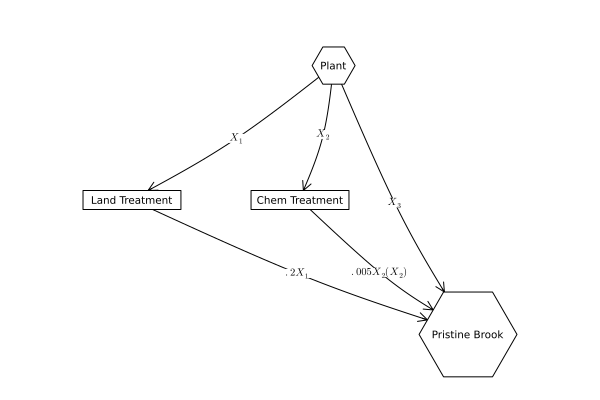

In [98]:

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"X_3",(2, 4) => L".2X_1",(3, 4) => L".005X_2(X_2)")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)


I first decided to write an equation for the amount of YUK discharged into the brook by slightly modifying the given equations. All YUK in wastewater going to direct disposal will enter the brook, so that part of the equation is simply represented by $X_3$. The expression for the amount of YUK entering the brook is:


$.2X_1$ + $.005X_2$ ($X_2$) + $X_3$

One constraint to this is that the amount of YUK entering the brook can't be greater than 100 kg/$m^2$ as that is the maximum discharge from the plant. The total amount of YUK discharged will also equal 100 kg/$m^2$ as the discharge from the plant is always the same. 

$X_1$ + $X_2$ + $X_3$ = 100

$X_3$ can also be represented as the remainder of YUK not treated, ie 100 - ($X_1$ + $X_2$). Overall, the equation would look like:

YUK entering brook = $.2X_1$ + $.005X_2$ ($X_2$) + 100 - ($X_1$ + $X_2$)

The cost equations were already given, so the overall equation is:
 
 Cost = $X_1^2/20$ + $1.50X_2$



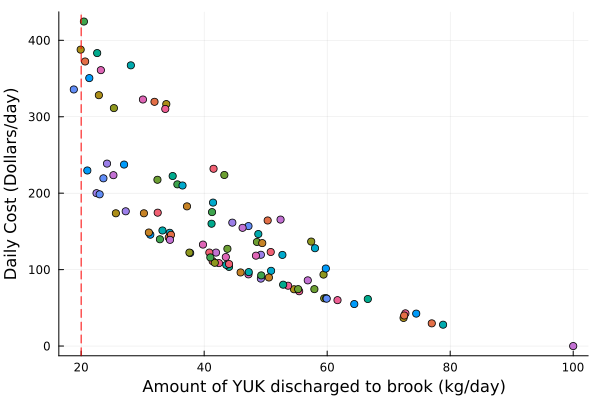

In [157]:
function yuk_model(x1,x2)
    #Broadcast all function arguments so vectors can be inputs
    #Find YUK entering brook by using equation
    yuk_amt = .2 .*x1 .+ .005 .*x2.*x2 .+ 100 .-(x1.+x2)
    #Find cost of treatment plan using equation
    cost = (x1.^2)./20 .+ 1.5.*x2
    return(yuk_amt, cost)
end


x1 = zeros(1,100)
x2 = zeros(1,100)
count = 1
#Randomly find values for amount of wastewater discharged to 
#Land disposal and chemical treatment
while count < 100
    #Randomly generate values to be tested as long as they don't exceed 100 
    #As that is the maximum discharge from the plant
    a = rand(1:100)
    b = rand(1:100)
    #If the total discharge to both treatment methods is less than 100 kg
    #Add the values to the arrays to be inputed to yuk_model function
    if a+b <= 100
        x1[count] = a
        x2[count] = b
        count = count +1
    end
end

#Plot the YUK discharge to brook and cost against each other
yuk_amt, cost = yuk_model(x1,x2)
p = scatter(yuk_amt,cost, legend = false)
xlabel!("Amount of YUK discharged to brook (kg/day)")
ylabel!("Daily Cost (Dollars/day)")
#Add line to clearly show when discharge to brook is less than 
#20 kg/$m^3$
vline!(p, [20], color=:red, linestyle=:dash)

The above code represents the equations defined earlier in Julia. A treatment plan serves as the function input, consisting of different values for the amount of wastewater going to the land disposal treatment plan ($X_1$) and the chemical treatment plan ($X_2$). Random combinations of values were added to the arrays (as long as the combination of treatments didn't exceed 100) to find the results of different combinations of ways to dispose of waste. When the arrays were plotted, some of the random combinations resulted in less than 20 kg of YUK entering the brook. However, these generally had a high cost, over $300 per day. So, it can be said that to remove more YUK, more money has to be spent. To find a better solution you could run more combinations of discharges, maybe running through every possible one if you had the computing power. 

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

For question 3, used this link to find out what built in Julia function could do the same thing as the given function:https://stackoverflow.com/questions/46240706/julia-detect-and-remove-duplicate-rows-from-array

For question 4, used this Ed Discussion post as a reference to how to make the red line: https://edstem.org/us/courses/59593/discussion/5222471
